In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

611

In [6]:
import requests
from config import weather_api_key

In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7293673d7092ef3881f04c25546df694


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace("Cabo","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ahipara
Processing Record 2 of Set 1 | teguise
Processing Record 3 of Set 1 | santa rosa
Processing Record 4 of Set 1 | lahaina
Processing Record 5 of Set 1 | lebu
Processing Record 6 of Set 1 | samusu
City not found. Skipping...
Processing Record 7 of Set 1 | hovd
Processing Record 8 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 9 of Set 1 | klaksvik
Processing Record 10 of Set 1 | hobart
Processing Record 11 of Set 1 | campina verde
Processing Record 12 of Set 1 | veraval
Processing Record 13 of Set 1 | portland
Processing Record 14 of Set 1 | bambous virieux
Processing Record 15 of Set 1 | dikson
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | new norfolk
Processing Record 19 of Set 1 | khatanga
Processing Record 20 of Set 1 | galveston
Processing Record 21 of Set 1 | georgetown
Processing Record 2

Processing Record 39 of Set 4 | yangjiang
Processing Record 40 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 41 of Set 4 | ribeira grande
Processing Record 42 of Set 4 | provideniya
Processing Record 43 of Set 4 | mainaguri
Processing Record 44 of Set 4 | madona
Processing Record 45 of Set 4 | saint george
Processing Record 46 of Set 4 | palabuhanratu
City not found. Skipping...
Processing Record 47 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 48 of Set 4 | louisbourg
City not found. Skipping...
Processing Record 49 of Set 4 | svetlogorsk
Processing Record 50 of Set 4 | senanga
Processing Record 1 of Set 5 | palmer
Processing Record 2 of Set 5 | tawkar
City not found. Skipping...
Processing Record 3 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 4 of Set 5 | bolungarvik
City not found. Skipping...
Processing Record 5 of Set 5 | pevek
Processing Record 6 of Set 5 | boden
Processing Record 7 of Set 5 | teseney
Proces

Processing Record 23 of Set 8 | coihueco
Processing Record 24 of Set 8 | gardabani
Processing Record 25 of Set 8 | kaeo
Processing Record 26 of Set 8 | da lat
Processing Record 27 of Set 8 | hamilton
Processing Record 28 of Set 8 | pombas
Processing Record 29 of Set 8 | cockburn town
Processing Record 30 of Set 8 | coquimbo
Processing Record 31 of Set 8 | souillac
Processing Record 32 of Set 8 | finspang
Processing Record 33 of Set 8 | eunice
Processing Record 34 of Set 8 | kedarnath
City not found. Skipping...
Processing Record 35 of Set 8 | faanui
Processing Record 36 of Set 8 | srednekolymsk
Processing Record 37 of Set 8 | caxito
Processing Record 38 of Set 8 | college
Processing Record 39 of Set 8 | xinzhou
Processing Record 40 of Set 8 | rundu
Processing Record 41 of Set 8 | gondang
Processing Record 42 of Set 8 | beyneu
Processing Record 43 of Set 8 | scarborough
Processing Record 44 of Set 8 | coruripe
Processing Record 45 of Set 8 | belaya gora
Processing Record 46 of Set 8 | b

Processing Record 13 of Set 12 | bud
Processing Record 14 of Set 12 | liverpool
Processing Record 15 of Set 12 | obo
Processing Record 16 of Set 12 | turayf
Processing Record 17 of Set 12 | reconquista
Processing Record 18 of Set 12 | taree
Processing Record 19 of Set 12 | ovalle
Processing Record 20 of Set 12 | meadow lake
Processing Record 21 of Set 12 | guymon
Processing Record 22 of Set 12 | salou
Processing Record 23 of Set 12 | palu
Processing Record 24 of Set 12 | lolua
City not found. Skipping...
Processing Record 25 of Set 12 | melfort
Processing Record 26 of Set 12 | erdaojiang
Processing Record 27 of Set 12 | hobyo
Processing Record 28 of Set 12 | kaohsiung
Processing Record 29 of Set 12 | prince rupert
Processing Record 30 of Set 12 | pacific grove
Processing Record 31 of Set 12 | lodwar
Processing Record 32 of Set 12 | pundaguitan
Processing Record 33 of Set 12 | fengcheng
Processing Record 34 of Set 12 | cabo san lucas
Processing Record 35 of Set 12 | ploemeur
Processing 

In [13]:
len(city_data)

565

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ahipara,-35.1667,173.1667,67.66,85,100,11.72,NZ,2021-03-28 00:58:34
1,Teguise,29.0605,-13.5640,64.40,82,20,4.61,ES,2021-03-28 00:58:34
2,Santa Rosa,14.3122,121.1114,87.01,62,20,3.44,PH,2021-03-28 00:58:35
3,Lahaina,20.8783,-156.6825,82.40,57,40,23.02,US,2021-03-28 00:58:35
4,Lebu,-37.6167,-73.6500,56.14,86,0,18.86,CL,2021-03-28 00:58:36
5,Hovd,48.0056,91.6419,30.15,27,0,0.16,MN,2021-03-28 00:58:36
6,Klaksvik,62.2266,-6.5890,44.60,100,75,21.85,FO,2021-03-28 00:58:37
7,Hobart,-42.8794,147.3294,62.01,63,40,19.57,AU,2021-03-28 00:57:47
8,Campina Verde,-19.5356,-49.4864,76.53,50,29,2.59,BR,2021-03-28 00:58:37
9,Veraval,20.9000,70.3667,77.94,52,52,10.25,IN,2021-03-28 00:58:38


In [16]:
new_column_order = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ahipara,NZ,2021-03-28 00:58:34,-35.1667,173.1667,67.66,85,100,11.72
1,Teguise,ES,2021-03-28 00:58:34,29.0605,-13.5640,64.40,82,20,4.61
2,Santa Rosa,PH,2021-03-28 00:58:35,14.3122,121.1114,87.01,62,20,3.44
3,Lahaina,US,2021-03-28 00:58:35,20.8783,-156.6825,82.40,57,40,23.02
4,Lebu,CL,2021-03-28 00:58:36,-37.6167,-73.6500,56.14,86,0,18.86
...,...,...,...,...,...,...,...,...,...
560,Brazzaville,CG,2021-03-28 01:02:41,-4.2658,15.2832,75.20,83,20,4.61
561,Kaoma,ZM,2021-03-28 01:02:14,-14.7833,24.8000,61.02,96,69,4.74
562,Beri,IN,2021-03-28 01:02:42,25.9031,79.8902,76.84,18,0,3.83
563,Khoy,IR,2021-03-28 01:02:42,38.5504,44.9535,34.14,85,14,2.77


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

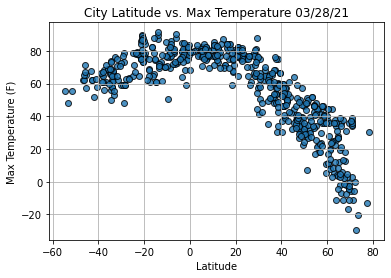

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

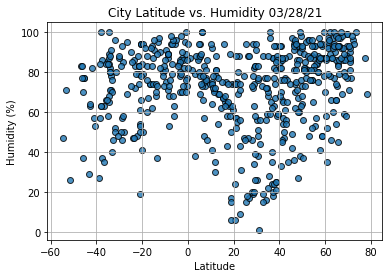

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

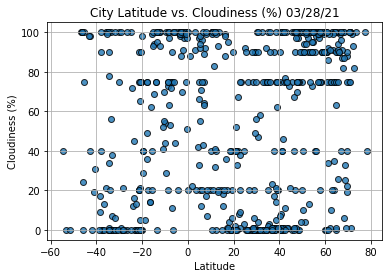

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

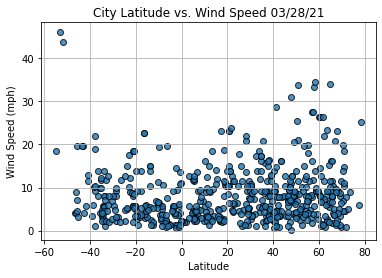

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()